1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante regresión logística, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]]
- ¿Qué acierto tiene tu modelo? (score)
- Utiliza un conjunto de test con el 40% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Virginica" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras la regresión logística un buen algoritmo para estos datos? ¿por qué?

## Loading Data

In [10]:
import pandas as pd 
import numpy as np 
from sklearn import linear_model
from sklearn import model_selection
#from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb


In [11]:
df = pd.read_csv("../data/iris.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [12]:
X = np.array(df.drop(["variety"], axis= 1))

In [13]:
# target 
y = np.array(df["variety"])

In [14]:
print("X:", X.shape)
print("y:", y.shape)

X: (150, 4)
y: (150,)


## Data Visualizing

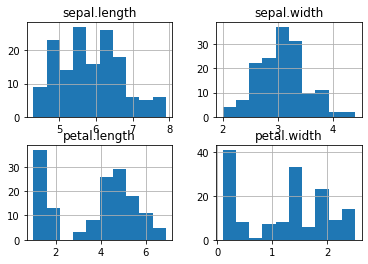

In [16]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

df.drop(['variety'], 1).hist()
plt.show()

C:\Program Files\Python37\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


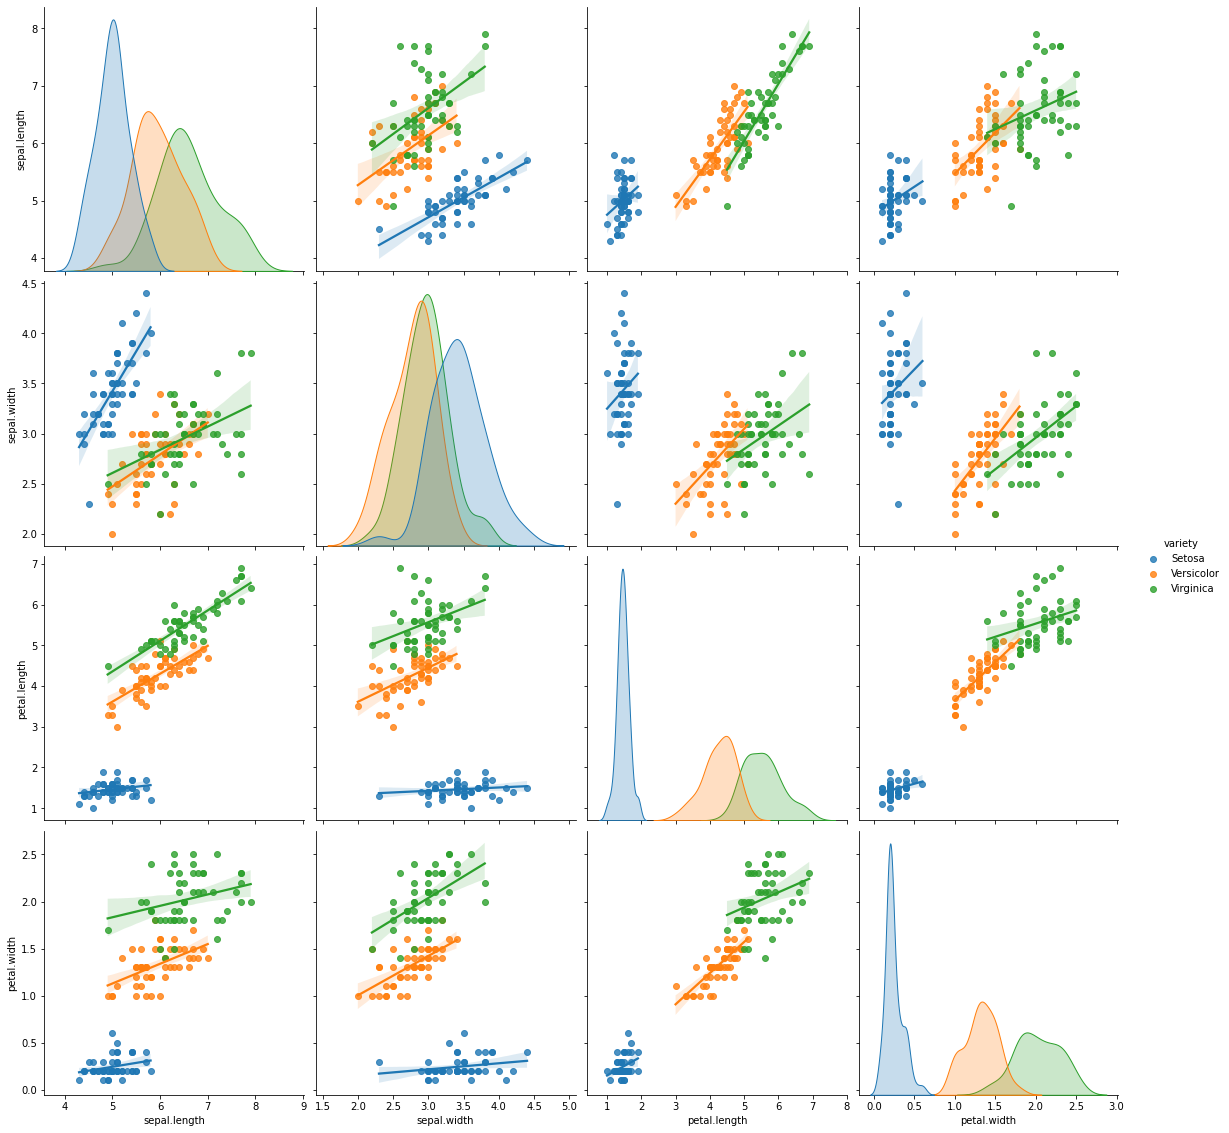

In [17]:
sb.pairplot(df.dropna(), hue='variety',size=4,vars=["sepal.length", "sepal.width","petal.length","petal.width"],kind='reg') # "reg" de regresión lineal

## Inicialize the parameters

In [18]:
#here is not training
model = linear_model.LogisticRegression(max_iter=100)

model.fit(X,y)
model.score(X, y)

C:\Users\Karina\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9733333333333334

### Training split, test size = 20%

In [21]:
from sklearn.model_selection import train_test_split

X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X, y, test_size=0.2 ,random_state=42)
print('X_train_20:', X_train_20.shape)
print('X_test_20:', X_test_20.shape)
print('y_train_20:', y_train_20.shape)
print('y_test_20:', y_test_20.shape)

X_train_20: (120, 4)
X_test_20: (30, 4)
y_train_20: (120,)
y_test_20: (30,)


### Cross Validation

In [30]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
name='Logistic Regression, test size = 20%'
kfold = KFold(n_splits=10, random_state = 42, shuffle = True) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = cross_val_score(model, X_train_20, y_train_20, cv=kfold, scoring='accuracy',)
msg = "%s: %f %s (%f)" % (name, cv_results.mean(), "+-", cv_results.std())
print(cv_results)
print("----------")
print(msg)
print("")
print("----------")


[0.91666667 1.         1.         1.         0.83333333 1.
 0.83333333 0.91666667 1.         1.        ]
----------
Logistic Regression, test size = 20%: 0.950000 +- (0.066667)

----------
C:\Users\Karina\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Karina\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the

###  After the Cross Validation and with optimus results, we can try with all training set.